# TRABALHO MULTIDISCIPLINAR (MAC035-2025.1)

##  TEMA: MERCADO FINANCEIRO: ALEATORIO OU DETERMINADO?

- GRUPO:

  FELIPE

  FELIX

  WILLIAM


### Trading com cara e coroa e Monte Carlo

In [ ]:
!pip install yfinance -q

In [ ]:
# Carregando as bibliotecas

from datetime import datetime
import random
import yfinance as yf
import pandas as pd
import numpy as np
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import sys
import time

Baixando dados para ^GSPC de 2010-01-01 até 2025-01-01...
Dados carregados e processados.

Iniciando 1000 simulações da estratégia 'Cara ou Coroa'...
Simulações concluídas.

--- Estatísticas Corrigidas da Simulação ---
Para o ativo ^GSPC, com base em 1000 simulações:
---------------------------------------------------------
Retorno total médio: -97.70%
Retorno total máximo: -87.99%
Retorno total mínimo: -99.83%

Com base nos resultados finais:
    50% de chance de um retorno total maior que: -98.18% (Mediana)
    25% de chance de um retorno total maior que: -97.09% (3º Quartil)
     5% de chance de um retorno total maior que: -94.26% (Percentil 95)
---------------------------------------------------------

Gerando gráfico das simulações...


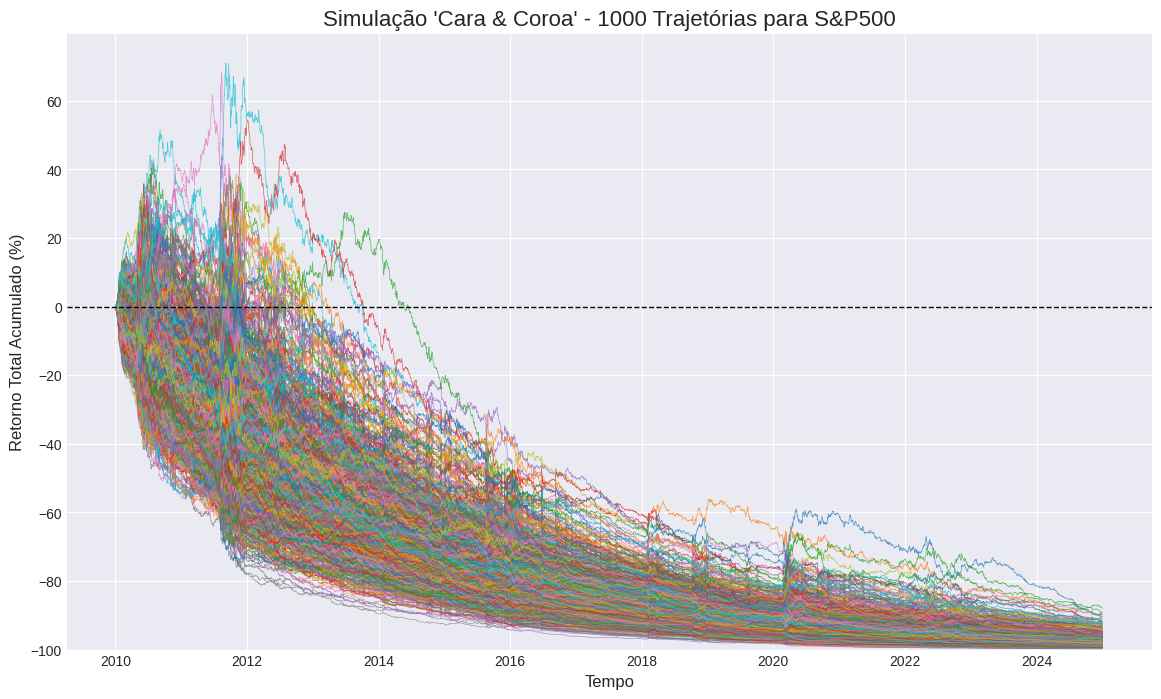

In [ ]:

# PARÂMETROS DA SIMULAÇÃO
stock_symbol = "^GSPC"    #Indice S&P500
start_date = "2010-01-01"
end_date = "2025-01-01"
num_sim = 1000      # Número de simulações (vidas financeiras)
op_cost = 0.001     # Custo operacional de 0.1% por transação


# 2. Obtenção dos Dados
print(f"Baixando dados para {stock_symbol} de {start_date} até {end_date}...")
# Use auto_adjust=False to get the original columns, including 'Adj Close' if available
data = yf.download(stock_symbol, start=start_date, end=end_date, progress=False, auto_adjust=False)

# Check for 'Adj Close' in the multi-level columns
adj_close_col = ('Adj Close', stock_symbol)
close_col = ('Close', stock_symbol)

if adj_close_col in data.columns:
    daily_market_returns = data[adj_close_col].pct_change().dropna()
else:
    # If 'Adj Close' is not found, use 'Close'
    if close_col in data.columns:
        print(f"Warning: ('Adj Close', '{stock_symbol}') not found, using ('Close', '{stock_symbol}').")
        daily_market_returns = data[close_col].pct_change().dropna()
    else:
        # Handle case where neither 'Adj Close' nor 'Close' is found
        print(f"Error: Neither 'Adj Close' nor 'Close' found for {stock_symbol}. Cannot calculate returns.")
        daily_market_returns = pd.Series([], dtype=float) # Create an empty series


print("Dados carregados e processados.")


# 3. Execução da Simulação de Monte Carlo
print(f"\nIniciando {num_sim} simulações da estratégia 'Cara ou Coroa'...")

if not daily_market_returns.empty:
    # Gera todos os sinais aleatórios (-1 para Venda, +1 para Compra) de uma vez
    random_signals = np.random.choice([-1, 1], size=(len(daily_market_returns), num_sim))

    # Calcula os retornos diários da estratégia (já líquidos de custo)
    # Para este modelo, o custo é diário, pois a posição é sempre reafirmada.
    strategy_daily_returns = (random_signals * daily_market_returns.values[:, np.newaxis]) - op_cost

    # --- CORREÇÃO PRINCIPAL ---
    # Calcula a curva de patrimônio usando o PRODUTO CUMULATIVO (cumprod).
    # (1 + retorno diário) é o fator de multiplicação do capital no dia.
    # O resultado é o valor do patrimônio, assumindo que começou com 1.
    equity_curves_df = (1 + pd.DataFrame(strategy_daily_returns, index=daily_market_returns.index)).cumprod()

    print("Simulações concluídas.")


    # 4. Cálculo das Estatísticas Finais
    # Para obter o retorno total, pegamos o valor final do patrimônio e subtraímos 1.
    final_total_returns = equity_curves_df.iloc[-1] - 1

    print("\n--- Estatísticas Corrigidas da Simulação ---")
    print(f"Para o ativo {stock_symbol}, com base em {num_sim} simulações:")
    print("---------------------------------------------------------")
    print(f"Retorno total médio: {final_total_returns.mean() * 100:.2f}%")
    print(f"Retorno total máximo: {final_total_returns.max() * 100:.2f}%")
    print(f"Retorno total mínimo: {final_total_returns.min() * 100:.2f}%")
    print()
    print("Com base nos resultados finais:")
    print(f"    50% de chance de um retorno total maior que: {final_total_returns.median() * 100:.2f}% (Mediana)")
    print(f"    25% de chance de um retorno total maior que: {final_total_returns.quantile(0.75) * 100:.2f}% (3º Quartil)")
    print(f"     5% de chance de um retorno total maior que: {final_total_returns.quantile(0.95) * 100:.2f}% (Percentil 95)")
    print("---------------------------------------------------------")


    # 5. Visualização dos Resultados
    print("\nGerando gráfico das simulações...")
    # Converte o valor do patrimônio em retorno percentual para o gráfico
    return_curves_df = (equity_curves_df - 1) * 100

    plt.style.use('seaborn-v0_8-darkgrid')
    plt.figure(figsize=(14, 8))
    plt.plot(return_curves_df, linewidth=0.5, alpha=0.7)

    plt.title(f"Simulação 'Cara & Coroa' - {num_sim} Trajetórias para S&P500", fontsize=16)
    plt.xlabel("Tempo", fontsize=12)
    plt.ylabel("Retorno Total Acumulado (%)", fontsize=12)
    plt.axhline(0, color='black', linestyle='--', linewidth=1)
    plt.ylim(bottom=-100) # Define o limite inferior do eixo Y em -100%
    plt.grid(True)
    plt.show()
else:
    print("Não foi possível executar a simulação devido à falta de dados de retorno.")

### METODO DE HESTON



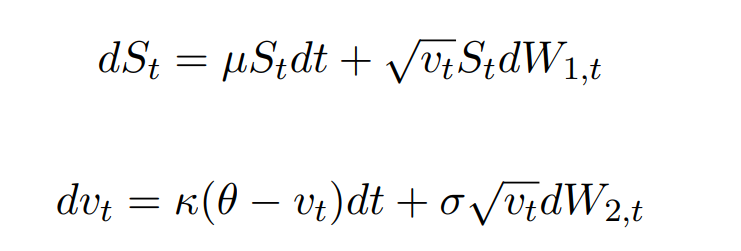

κ(kappa) é a velocidade de reversão da volatilidade: Modela a tendência da volatilidade de voltar a um nível normal

θ (theta)  é a volatilidade média de longo prazo: O "nível normal" para o qual a volatilidade tende a retornar

σ (sigma) é a volatilidade da volatilidade (vol of vol) : captura o quão instável é a própria volatilidade),

W1(t) e W2(t) são movimentos brownianos correlacionados com correlação ρ(rho). Essa correlação é tipicamente negativa: quando o preço do ativo cai, a volatilidade tende a subir (o mercado fica com medo)



Valores calibrado para o SP500

κ = 2.5 (valor central entre 2 e 3)

θ (theta) = 0.025 (variância de longo prazo, correspondendo a uma volatilidade de sqrt(0.025) ≈ 15.8%, que está no centro da faixa de 14-17%)

σ (sigma) = 0.55 (valor central entre 0.4 e 0.7)

ρ (rho) = -0.5 (valor central entre -0.4 e -0.6)

v₀ (variância inicial) = 0.03 (valor central entre 2% e 4%)

### TESTE COM AÇOES: NVIDIA, INTEL E AMD



Iniciando coleta de dados...
Dados para todos os ativos carregados e alinhados.

Definindo parâmetros e rodando simulações...

--- Executando backtest para: ^GSPC ---

--- Executando backtest para: NVDA ---

--- Executando backtest para: AMD ---

--- Executando backtest para: INTC ---

Todos os backtests foram concluídos!


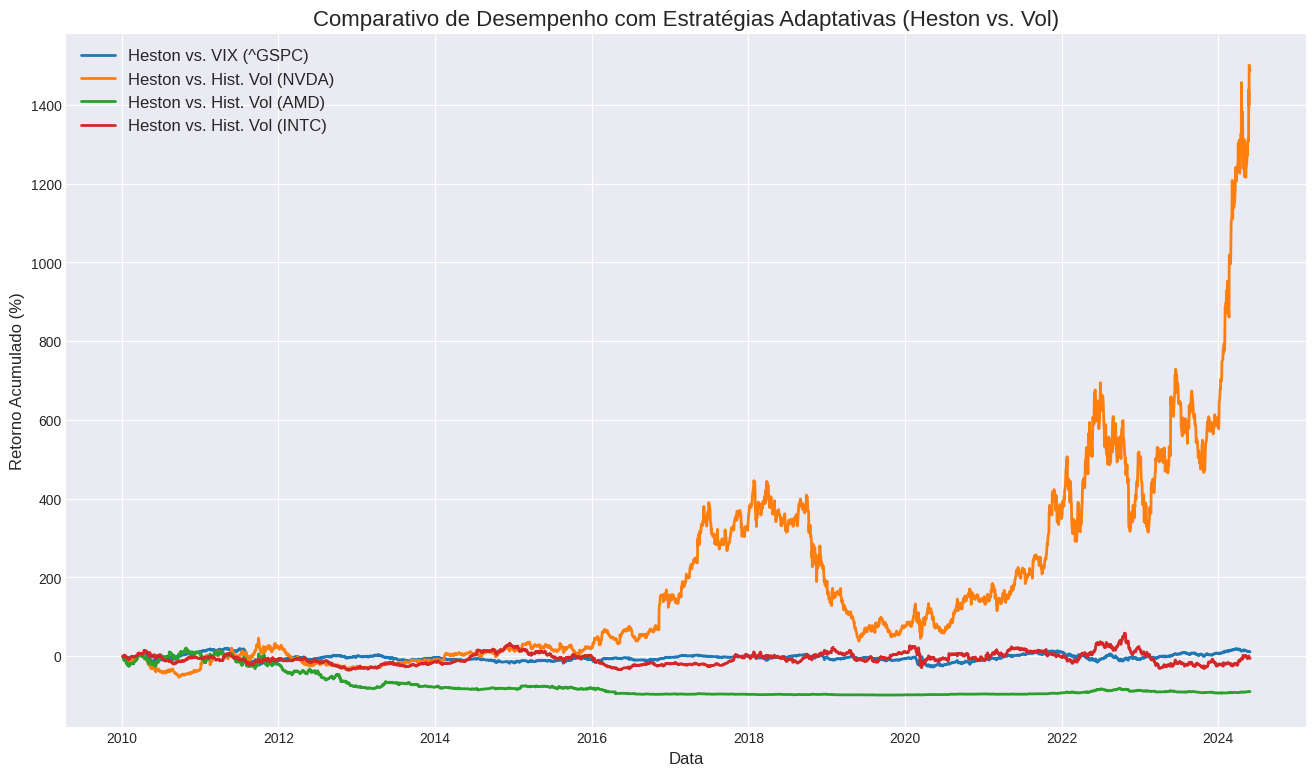


--- Gerando Gráficos de Desempenho Individual ---


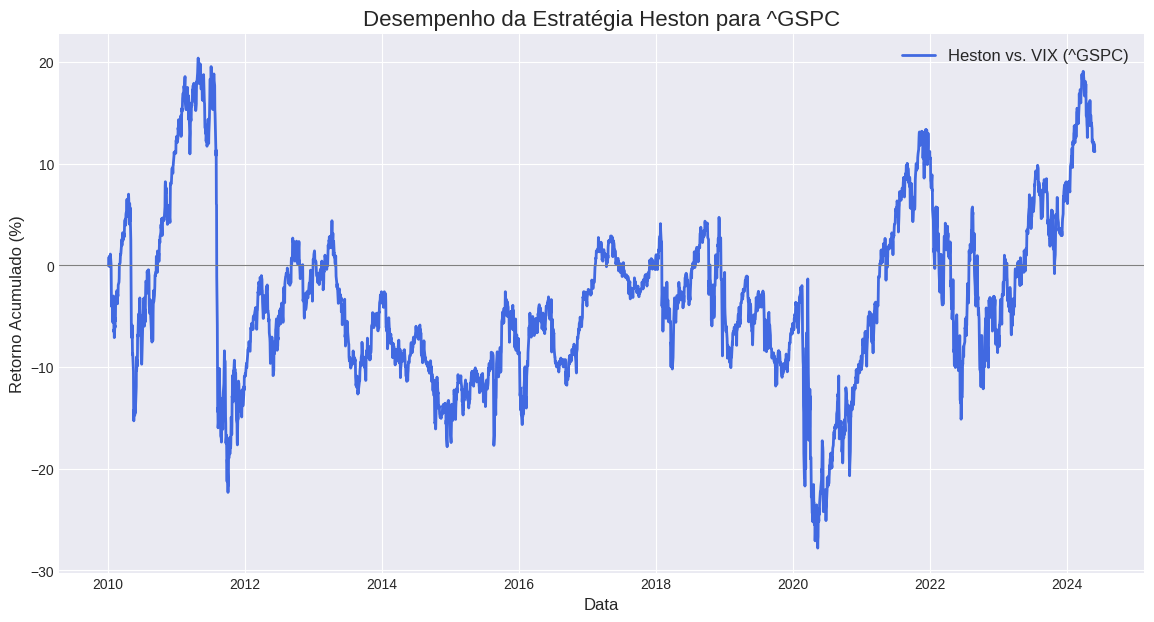

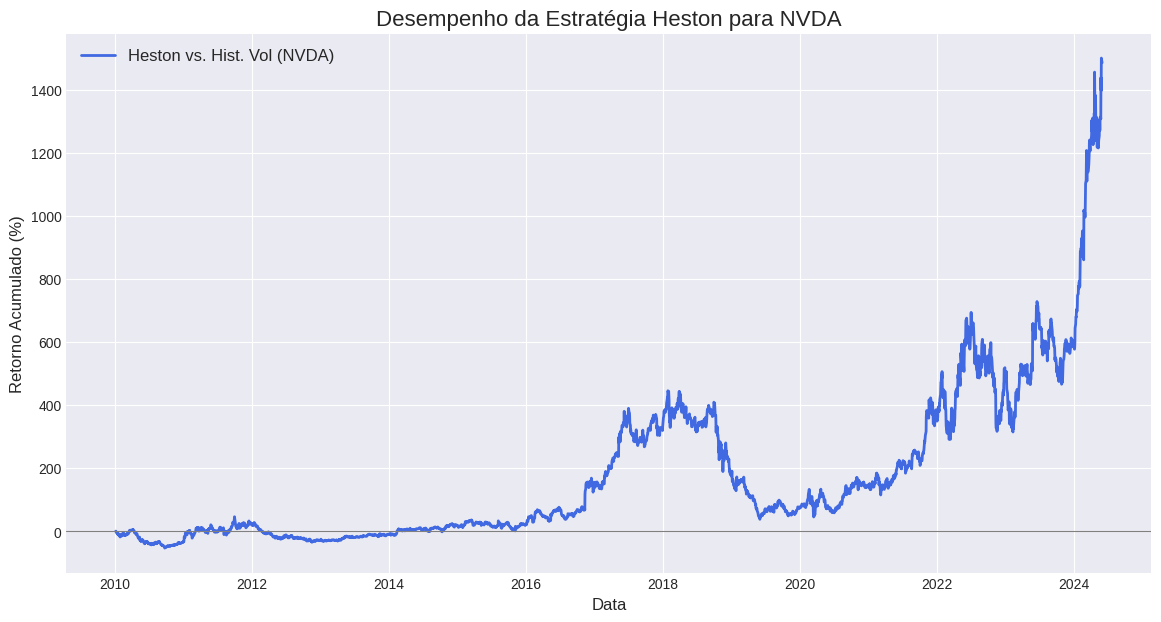

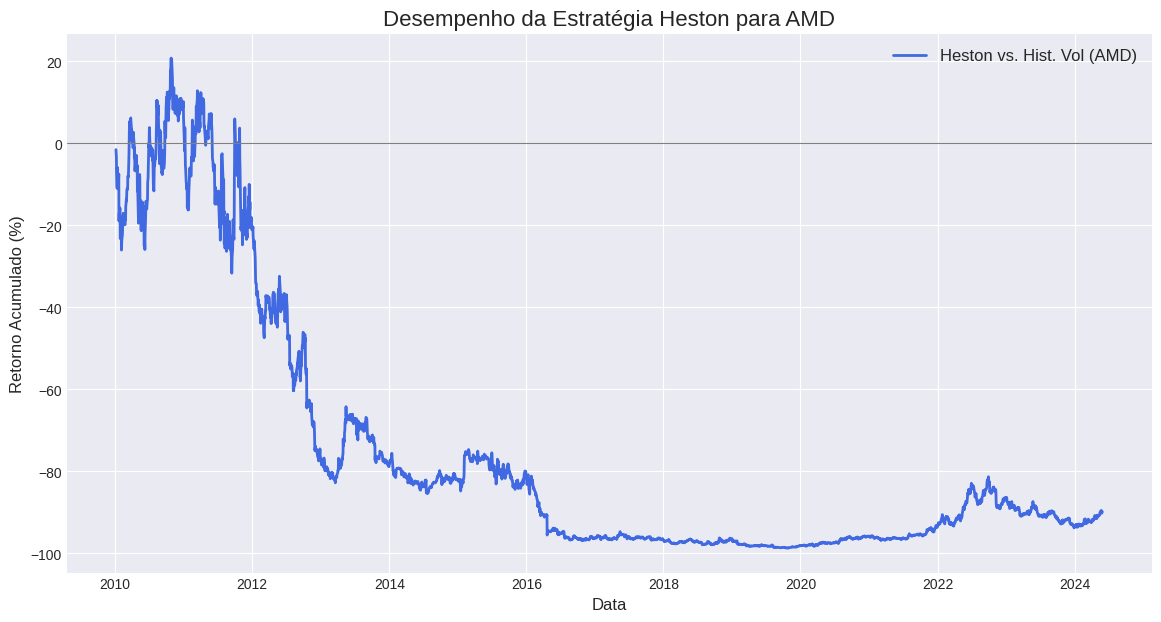

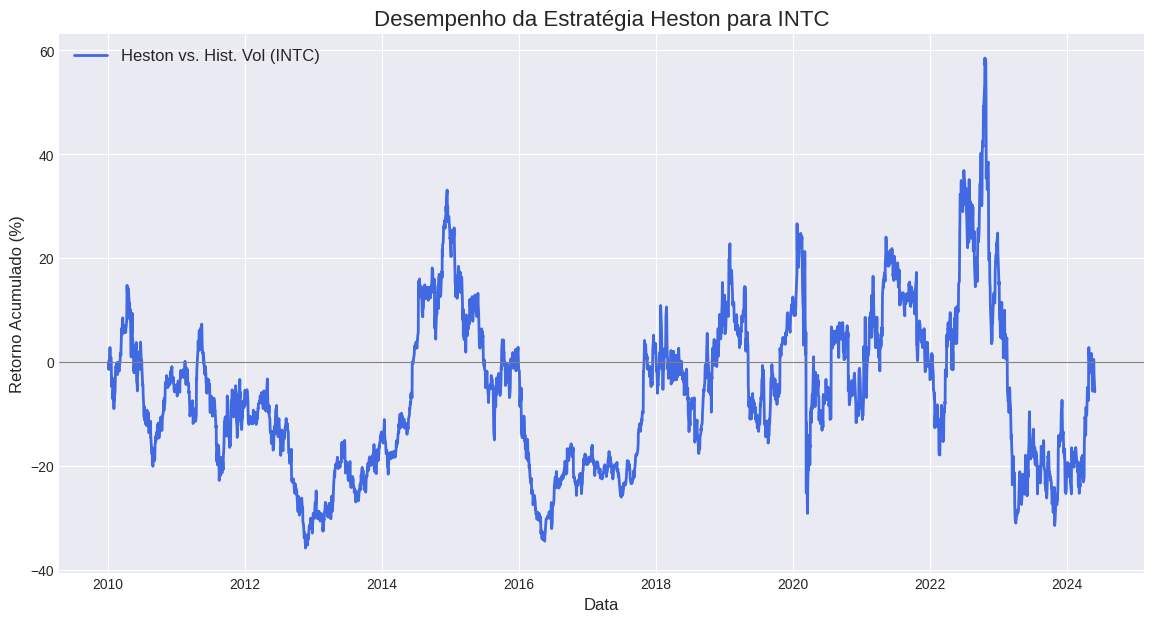


--- Retorno Médio para Prazos Fixos (Análise de Janelas Deslizantes) ---

Ativo: ^GSPC
  Retorno Médio (1 Ano): 1.44%
  Retorno Médio (3 Anos): 1.70%
  Retorno Médio (5 Anos): 0.85%
  Retorno Médio (10 Anos): 1.30%

Ativo: NVDA
  Retorno Médio (1 Ano): 32.57%
  Retorno Médio (3 Anos): 107.52%
  Retorno Médio (5 Anos): 157.99%
  Retorno Médio (10 Anos): 485.16%

Ativo: AMD
  Retorno Médio (1 Ano): 2.06%
  Retorno Médio (3 Anos): 36.46%
  Retorno Médio (5 Anos): 3.43%
  Retorno Médio (10 Anos): -79.74%

Ativo: INTC
  Retorno Médio (1 Ano): 1.01%
  Retorno Médio (3 Anos): 4.59%
  Retorno Médio (5 Anos): 8.41%
  Retorno Médio (10 Anos): 16.55%


In [ ]:

#Coleta de Dados para Todos os Ativos
print("Iniciando coleta de dados...")
tickers = ['^GSPC', 'NVDA', 'AMD', 'INTC', '^VIX']
start_date = "2010-01-01"
end_date = "2024-05-30"

all_data = yf.download(tickers, start=start_date, end=end_date, progress=False, auto_adjust=False)

#Prepara o DataFrame final com os retornos e o VIX
df = pd.DataFrame()
for ticker in ['^GSPC', 'NVDA', 'AMD', 'INTC']:
    df[f'Returns_{ticker}'] = all_data['Close'][ticker].pct_change()

df['VIX_Close'] = all_data['Close']['^VIX']   # Puxa o VIX para comparar no futuro
df = df.dropna()
print("Dados para todos os ativos carregados e alinhados.")

#Função de Simulação do Modelo Heston
#Gera diversas iteracoes para obter uma uma media de vol futura
def simulate_heston_paths(S0, v0, r, kappa, theta, sigma, rho, T, M, N):
    dt = T / M
    prices = np.zeros((M + 1, N))
    variances = np.zeros((M + 1, N))
    prices[0], variances[0] = S0, v0 # preco e vol atual

    Z1 = np.random.normal(size=(M, N))  # choque de aletoriedade
    Z2 = np.random.normal(size=(M, N))
    dW1 = np.sqrt(dt) * Z1
    dW2 = np.sqrt(dt) * (rho * Z1 + np.sqrt(1 - rho**2) * Z2)

    epsilon = 1e-10
    #itera para calcular preco e volatilidade
    for t in range(1, M + 1):
        # a variancia tende a voltar pra média (theta) e sofre uns choques aleatorios
        variances[t] = (variances[t-1] + kappa * (theta - np.maximum(variances[t-1], 0)) * dt +
                        sigma * np.sqrt(np.maximum(variances[t-1], 0) + epsilon) * dW2[t-1])
        # o preco rende uma taxinha 'r' e também sofre os choques aleatórios com base na vol
        prices[t] = prices[t-1] * np.exp((r - 0.5 * np.maximum(variances[t-1], 0)) * dt + np.sqrt(np.maximum(variances[t-1], 0) + epsilon) * dW1[t-1])
    return prices, variances

#Função de Backtest
def run_heston_backtest(returns_series, heston_params, sim_params, strategy_mode, op_cost, vix_series=None):
    kappa, theta, sigma, rho, r = heston_params
    N, T, M = sim_params
    historical_vol_50d = returns_series.rolling(window=50).std() * np.sqrt(252) * 100  #media de volatidade dos ultimos 50 dias para acoes

    signals = []

    for i in range(len(returns_series)):
        #Pego a volatilidade dos últimos 22 dias (1 mês de pregão) pra ter um valor inicial.
        if i < 22:
            v0 = theta
        else:
            historical_returns_v0 = returns_series.iloc[i-22:i]
            if len(historical_returns_v0.dropna()) >= 22:
                 v0 = (historical_returns_v0.std() * np.sqrt(252))**2
            else:
                 v0 = theta

        _, simulated_variances = simulate_heston_paths(1, v0, r, kappa, theta, sigma, rho, T, M, N) # Roda o Heston pra prever a volatilidade futura
        mean_future_variance = np.mean(simulated_variances[-1])
        heston_forecast_annualized = np.sqrt(mean_future_variance) * 100 #gera a media da volatilidade %

        signal = 1 # começa querendo comprar.
        if strategy_mode == 'vs_vix': #para indices
            vix_market = vix_series.iloc[i]
            VIX_CRISE = 40.0
            # Se a nossa previsão de vol for maior que o VIX, ou se o VIX já explodiu, melhor vender
            if (heston_forecast_annualized > vix_market) or (vix_market > VIX_CRISE):
                signal = -1
        elif strategy_mode == 'vs_historical_vol': # para acoes
            hist_vol_market = historical_vol_50d.iloc[i]
            if not np.isnan(hist_vol_market) and heston_forecast_annualized < hist_vol_market:
                signal = -1
        signals.append(signal)

    signals_s = pd.Series(signals, index=returns_series.index)
    trades = signals_s.diff().ne(0) # dias operados
    trades.iloc[0] = True
    daily_costs = trades * op_cost # custo total
    strategy_returns = (signals_s * returns_series.shift(-1)) - daily_costs # retorno final = sinal * resultado - custo

    equity_curve = (1 + strategy_returns).cumprod() - 1
    return equity_curve, strategy_returns

#Execução Principal
print("\nDefinindo parâmetros e rodando simulações...")
# parametros especificos de cada ativo [ kappa, theta, sigma, rho ]
asset_specific_params = {
    '^GSPC': [2.5, 0.025, 0.55, -0.5],
    'NVDA':  [2.5, 0.25,  0.9,  -0.75],
    'INTC':  [4.0, 0.12,  0.4,  -0.55],
    'AMD':   [3.0, 0.18,  0.7,  -0.70]
}
op_cost_net = 0.001
r = 0.02
sim_params = [1000, 30/252, 30] #1000 simulações, pra 30 dias no futuro, com 30 passos

asset_tickers = ['^GSPC', 'NVDA', 'AMD', 'INTC']
results_net = {}
daily_returns_net = {}

# Loop final que passa por cada ativo e roda o backtest
for ticker in asset_tickers:
    print(f"\n--- Executando backtest para: {ticker} ---")
    heston_params = asset_specific_params[ticker] + [r]
    returns_col = f'Returns_{ticker}'

    # A estratégia pro S&P 500 usa o VIX. Para os outros, a media da vol 50 dias
    strategy_mode = 'vs_vix' if ticker == '^GSPC' else 'vs_historical_vol'
    vix_input = df['VIX_Close'] if ticker == '^GSPC' else None

    equity_curve, daily_returns = run_heston_backtest(df[returns_col], heston_params, sim_params,
                                                      strategy_mode, op_cost=op_cost_net, vix_series=vix_input)
    results_net[ticker] = equity_curve
    daily_returns_net[ticker] = daily_returns

print("\nTodos os backtests foram concluídos!")


#Consolidação e Visualização dos Resultados
results_df_net = pd.DataFrame({k: v for k, v in results_net.items() if v is not None}).dropna()


#Gráfico 1: Curva de Patrimônio Comparativa (Líquido)
plt.style.use('seaborn-v0_8-darkgrid')
plt.figure(figsize=(16, 9))

for ticker in results_df_net.columns:
    label = f'Heston vs. VIX ({ticker})' if ticker == '^GSPC' else f'Heston vs. Hist. Vol ({ticker})'
    plt.plot((results_df_net[ticker] * 100), label=label, linewidth=2)


plt.title('Comparativo de Desempenho com Estratégias Adaptativas (Heston vs. Vol)', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Retorno Acumulado (%)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Gráficos de Desempenho Individual por Ativo (Líquido)
print("\n--- Gerando Gráficos de Desempenho Individual ---")
for ticker in results_df_net.columns:
    plt.figure(figsize=(14, 7))

    label_net = f'Heston vs. VIX ({ticker})' if ticker == '^GSPC' else f'Heston vs. Hist. Vol ({ticker})'
    if ticker in results_df_net.columns and not results_df_net[ticker].dropna().empty:
        plt.plot((results_df_net[ticker].dropna() * 100), label=label_net, color='royalblue', linewidth=2)


    plt.title(f'Desempenho da Estratégia Heston para {ticker}', fontsize=16)
    plt.xlabel('Data', fontsize=12)
    plt.ylabel('Retorno Acumulado (%)', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.axhline(0, color='grey', linewidth=0.8) # Adiciona linha no zero
    plt.show()


#Análise de Janelas Deslizantes (Rolling Windows)
print("\n Retorno Médio para Prazos Fixos (Análise de Janelas Deslizantes) ")

# Define as janelas em dias de negociação (aproximadamente 252 por ano)
window_sizes = {
    '1 Ano': 252,
    '3 Anos': 252 * 3,
    '5 Anos': 252 * 5,
    '10 Anos': 252 * 10
}

# Itera sobre cada ativo para calcular e mostrar os resultados
for ticker in asset_tickers:
    print(f"\nAtivo: {ticker}")

    # Pega a série de retornos diários para o ticker atual
    strategy_daily_returns = daily_returns_net[ticker].dropna()
    daily_factors = 1 + strategy_daily_returns

    # Calcula o retorno para cada janela de tempo
    for name, window in window_sizes.items():
        if len(daily_factors) > window:
            # A função .rolling().apply(np.prod) calcula o produto acumulado dentro da janela
            rolling_total_returns = daily_factors.rolling(window=window).apply(np.prod, raw=True) - 1

            # Calcula a média de todos os retornos de período encontrados
            average_return = rolling_total_returns.mean() * 100
            print(f"  Retorno Médio ({name}): {average_return:.2f}%")
        else:
            print(f"  Retorno Médio ({name}): Não há dados suficientes para uma janela completa.")

In [ ]:
# Corrected code to access the column
aux = results_df['^GSPC']

# You can display the result to see the column data
display(aux)

,^GSPC
Date,
2010-12-31,0.011315
2011-01-03,0.009987
2011-01-04,0.015044
2011-01-05,0.012889
2011-01-06,0.011021
...,...
2024-12-19,4.081900
2024-12-20,4.118933
2024-12-23,4.175460


## Modelo GARCH


### Dados

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np

# Definindo o período do backtest
start_date = "2010-01-01"
end_date = "2024-06-30"

# Baixa os dados do S&P 500
sp500 = yf.download('^GSPC', start=start_date, end=end_date)

# Calcula os retornos logarítmicos diários
# Adjust for multi-level columns and get Log_Returns
if ('Adj Close', '^GSPC') in sp500.columns:
    sp500['Log_Returns'] = np.log(sp500[('Adj Close', '^GSPC')] / sp500[('Adj Close', '^GSPC')].shift(1))
else:
    print("Warning: ('Adj Close', '^GSPC') not found for S&P 500, using ('Close', '^GSPC').")
    sp500['Log_Returns'] = np.log(sp500[('Close', '^GSPC')] / sp500[('Close', '^GSPC')].shift(1))


# Baixa os dados do VIX
vix = yf.download('^VIX', start=start_date, end=end_date)

# Cria DataFrame unificado
# Adjust for multi-level columns and get VIX_Close
if ('Adj Close', '^VIX') in vix.columns:
    vix_close = vix[('Adj Close', '^VIX')] # Get the Series directly
else:
     print("Warning: ('Adj Close', '^VIX') not found for VIX, using ('Close', '^VIX').")
     vix_close = vix[('Close', '^VIX')] # Get the Series directly


df = pd.DataFrame({
    'SP500_Log_Returns': sp500['Log_Returns'],
    'VIX_Close': vix_close
})

# Remove linhas com dados faltantes
df.dropna(inplace=True)

# Visualiza as 5 primeiras linhas
print("✅ Dados coletados e preparados:")
display(df.head())

/tmp/ipython-input-26-4154533642.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500 = yf.download('^GSPC', start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-26-4154533642.py:22: FutureWarning: YF.download() has changed argument auto_adjust default to True
  vix = yf.download('^VIX', start=start_date, end=end_date)


[*********************100%***********************]  1 of 1 completed

✅ Dados coletados e preparados:


,SP500_Log_Returns,VIX_Close
Date,,
2010-01-05,0.003111,19.350000
2010-01-06,0.000545,19.160000
2010-01-07,0.003993,19.059999
2010-01-08,0.002878,18.129999
2010-01-11,0.001745,17.549999


### Modelo Arch


In [ ]:
pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.3/985.3 kB 11.4 MB/s eta 0:00:00


In [ ]:
from arch import arch_model

# Lista para armazenar as previsões de volatilidade
garch_forecasts = []

# Janela de histórico para treinar o modelo GARCH
window_size = 250  # aproximadamente 1 ano de pregão

# Vamos prever a volatilidade para o período de 2021
df_garch_backtest = df.loc[start_date:end_date].copy()

print("\n🔄 Estimando volatilidade com GARCH(1,1)...")

for i in range(len(df_garch_backtest)):
    end_idx = df_garch_backtest.index[i]
    start_idx = df_garch_backtest.index.get_loc(end_idx) - window_size
    if start_idx < 0:
        garch_forecasts.append(np.nan)
        continue

    # Seleciona a janela de treinamento
    train_returns = df_garch_backtest['SP500_Log_Returns'].iloc[start_idx:start_idx + window_size]

    # Ajusta o modelo GARCH(1,1)
    model = arch_model(train_returns, vol='GARCH', p=1, q=1, rescale=False)
    fitted_model = model.fit(disp='off')

    # Previsão de 1 passo à frente (variância)
    forecast = fitted_model.forecast(horizon=1)
    variance_forecast = forecast.variance.values[-1, 0]

    # Volatilidade anualizada (%)
    annualized_vol = np.sqrt(variance_forecast) * np.sqrt(252) * 100
    garch_forecasts.append(annualized_vol)

# Adiciona a coluna com as previsões ao DataFrame
df_garch_backtest['GARCH_Annualized'] = garch_forecasts

print("✅ Previsões GARCH adicionadas ao DataFrame.")
df_garch_backtest[['SP500_Log_Returns', 'VIX_Close', 'GARCH_Annualized']].dropna().head()


🔄 Estimando volatilidade com GARCH(1,1)...


/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


✅ Previsões GARCH adicionadas ao DataFrame.


,SP500_Log_Returns,VIX_Close,GARCH_Annualized
Date,,,
2010-12-31,-0.000191,17.750000,9.508129
2011-01-03,0.011251,17.610001,9.311710
2011-01-04,-0.001314,17.379999,10.289277
2011-01-05,0.004995,17.020000,10.170699
2011-01-06,-0.002125,17.400000,10.042985


### Geração de Sinais

In [ ]:
# Inicializa a lista de sinais
signals = []

# Geração dos sinais com base na comparação GARCH vs VIX
for i in range(len(df_garch_backtest)):
    garch_vol = df_garch_backtest['GARCH_Annualized'].iloc[i]
    vix_vol = df_garch_backtest['VIX_Close'].iloc[i]

    if np.isnan(garch_vol) or np.isnan(vix_vol):
        signals.append(np.nan)
        continue

    # Estratégia: Comprar quando VIX > GARCH previsto
    signal = 1 if vix_vol > garch_vol else -1
    signals.append(signal)

# Adiciona a coluna de sinais ao DataFrame
df_garch_backtest['GARCH_Signal'] = signals

# Visualiza os primeiros sinais
print("✅ Sinais gerados com base na comparação GARCH vs. VIX:")
df_garch_backtest[['GARCH_Annualized', 'VIX_Close', 'GARCH_Signal']].dropna().head()

✅ Sinais gerados com base na comparação GARCH vs. VIX:


,GARCH_Annualized,VIX_Close,GARCH_Signal
Date,,,
2010-12-31,9.508129,17.750000,1.0
2011-01-03,9.311710,17.610001,1.0
2011-01-04,10.289277,17.379999,1.0
2011-01-05,10.170699,17.020000,1.0
2011-01-06,10.042985,17.400000,1.0


###Aplicação de Sinais


In [ ]:
# Aplica o sinal ao retorno do dia seguinte (shift -1)
df_garch_backtest['GARCH_Strategy_Return'] = df_garch_backtest['GARCH_Signal'] * df_garch_backtest['SP500_Log_Returns'].shift(-1)

# Calcula o retorno acumulado da estratégia
df_garch_backtest['GARCH_Equity_Curve'] = (1 + df_garch_backtest['GARCH_Strategy_Return']).cumprod() - 1

# Visualiza o início
print("✅ Retorno da estratégia calculado:")
df_garch_backtest[['GARCH_Strategy_Return', 'GARCH_Equity_Curve']].dropna().head()

✅ Retorno da estratégia calculado:


,GARCH_Strategy_Return,GARCH_Equity_Curve
Date,,
2010-12-31,0.011251,0.011251
2011-01-03,-0.001314,0.009923
2011-01-04,0.004995,0.014967
2011-01-05,-0.002125,0.012810
2011-01-06,-0.001846,0.010940


### Visualizações de resultados

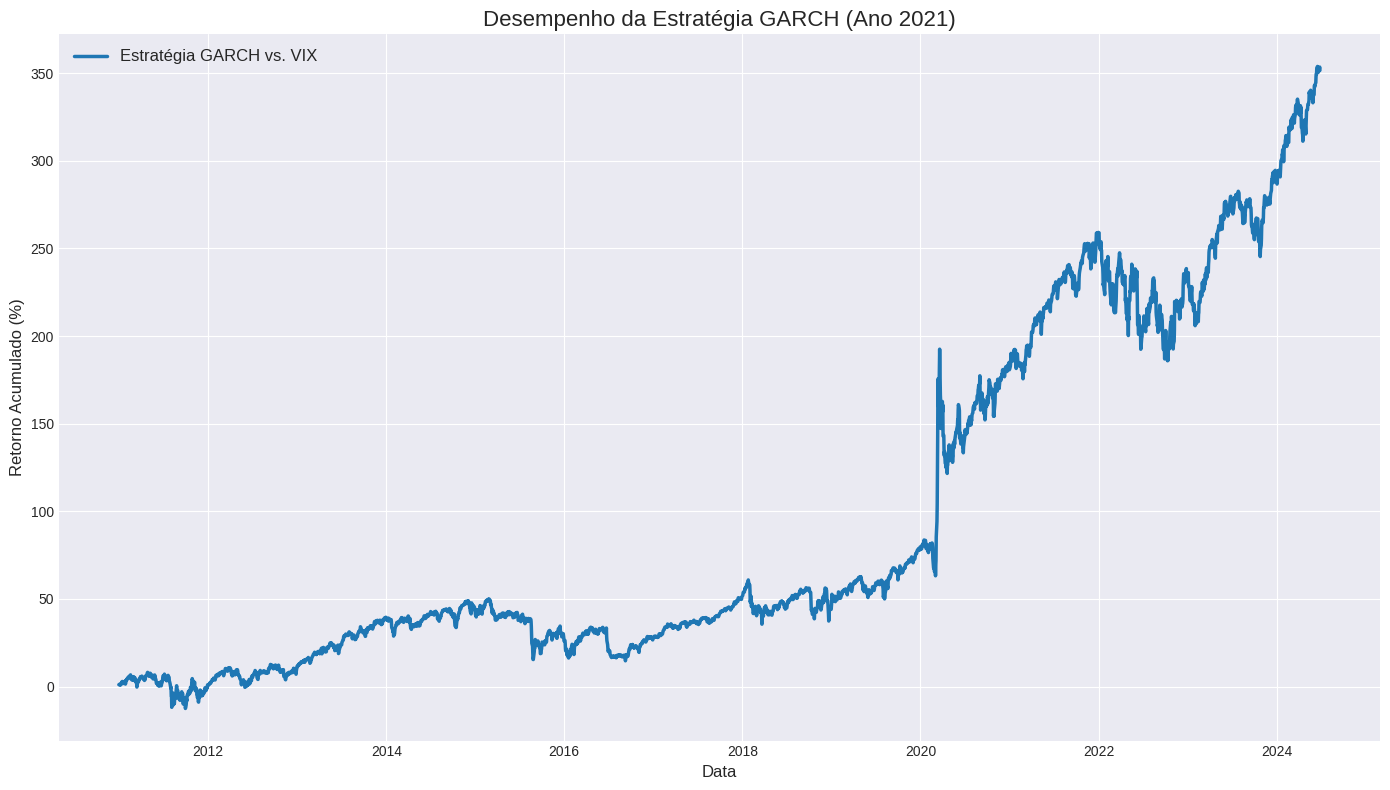

Retorno Total Acumulado da Estratégia GARCH vs. VIX em 2021: 351.63%


In [ ]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-darkgrid')
plt.figure(figsize=(14, 8))

# Plot da estratégia
plt.plot(df_garch_backtest['GARCH_Equity_Curve'] * 100, label='Estratégia GARCH vs. VIX', linewidth=2.5)

# Títulos e legendas
plt.title('Desempenho da Estratégia GARCH (Ano 2021)', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Retorno Acumulado (%)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# Imprime o retorno total acumulado da estratégia GARCH
# Use iloc[-2] to get the last valid cumulative return before the potential NaN from shift(-1)
total_return_garch = df_garch_backtest['GARCH_Equity_Curve'].iloc[-2] * 100
print(f"Retorno Total Acumulado da Estratégia GARCH vs. VIX em 2021: {total_return_garch:.2f}%")

Iniciando coleta de dados...
Dados para todos os ativos carregados e alinhados.

--- Executando backtest para: ^GSPC ---
Usando estratégia: GARCH vs. VIX
🔄 Estimando volatilidade com GARCH(1,1) e gerando sinais...


/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(



--- Executando backtest para: NVDA ---
Usando estratégia: GARCH vs. Volatilidade Histórica
🔄 Estimando volatilidade com GARCH(1,1) e gerando sinais...


/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(



--- Executando backtest para: AMD ---
Usando estratégia: GARCH vs. Volatilidade Histórica
🔄 Estimando volatilidade com GARCH(1,1) e gerando sinais...


/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(



--- Executando backtest para: INTC ---
Usando estratégia: GARCH vs. Volatilidade Histórica
🔄 Estimando volatilidade com GARCH(1,1) e gerando sinais...


/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(



Todos os backtests foram concluídos!


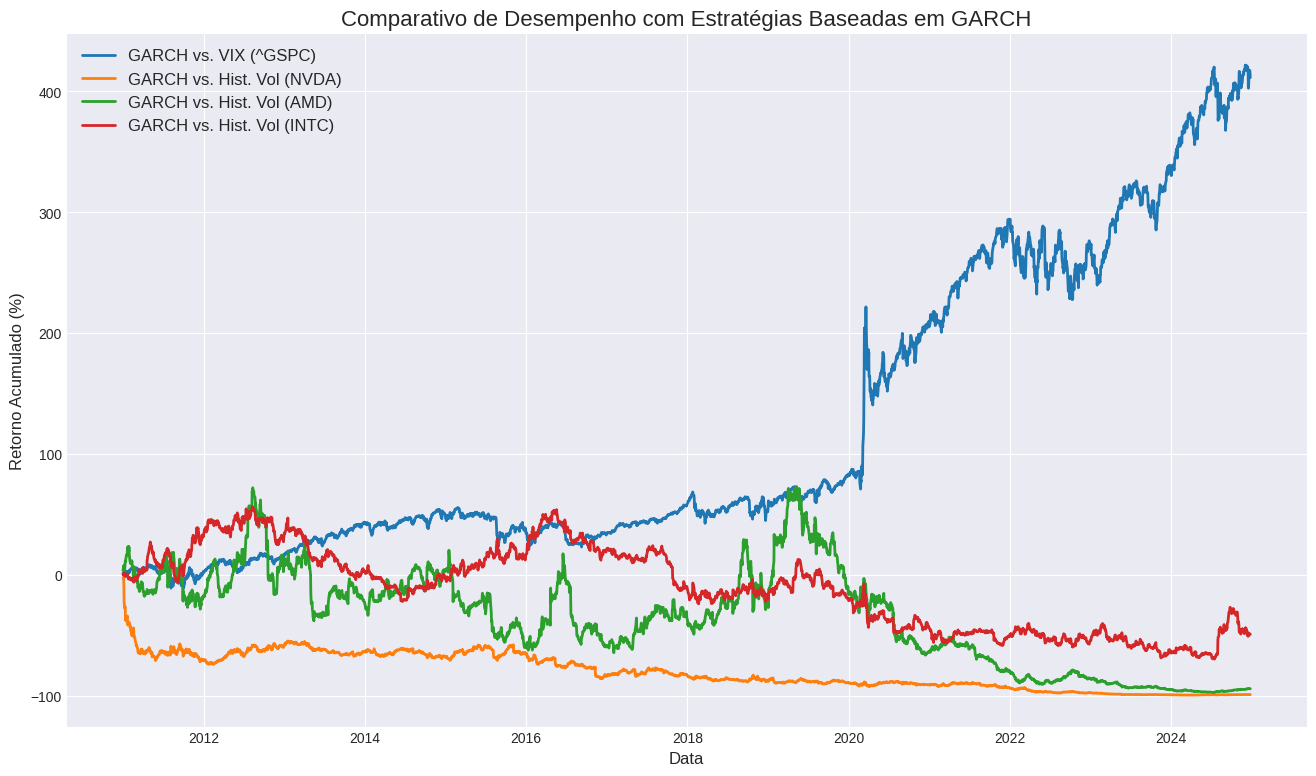


--- Gerando Gráficos de Desempenho Individual (GARCH) ---


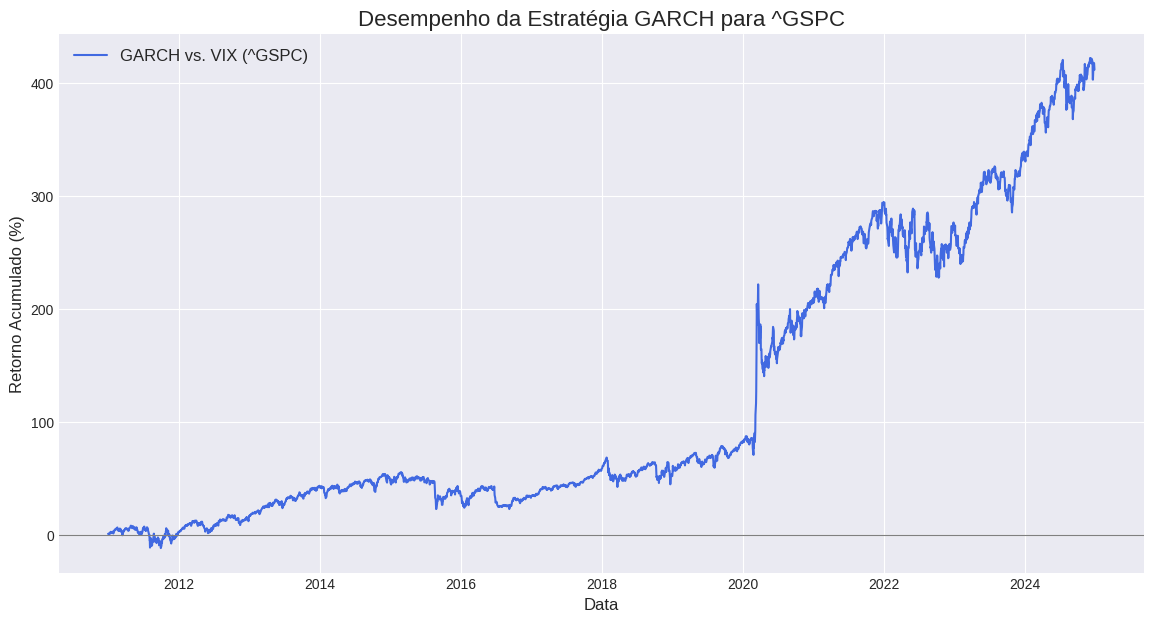

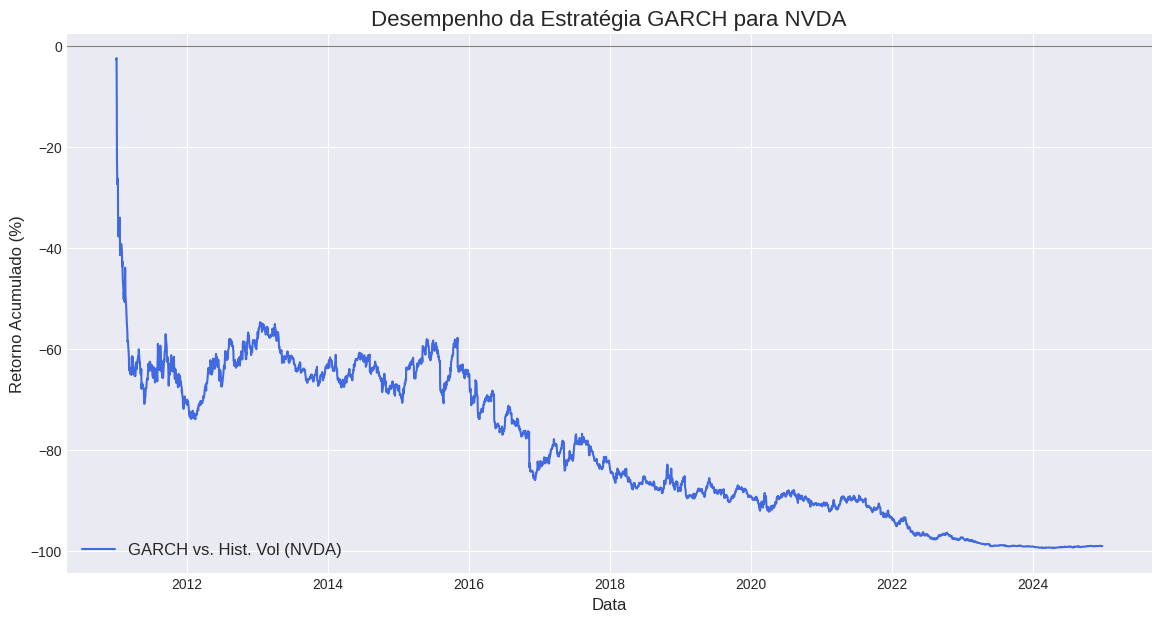

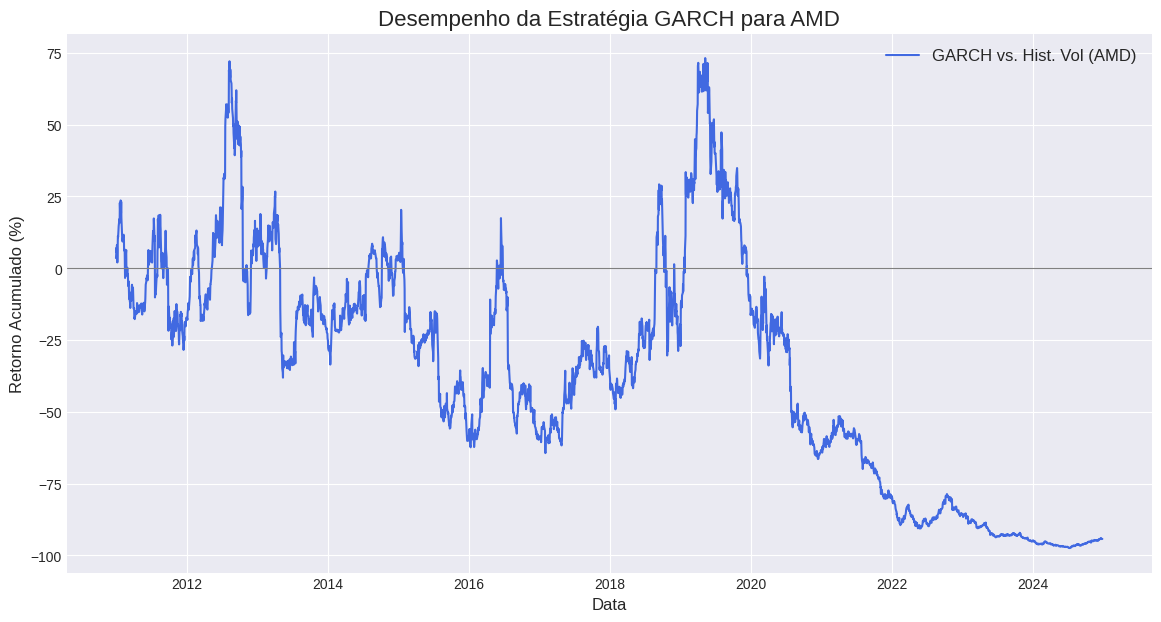

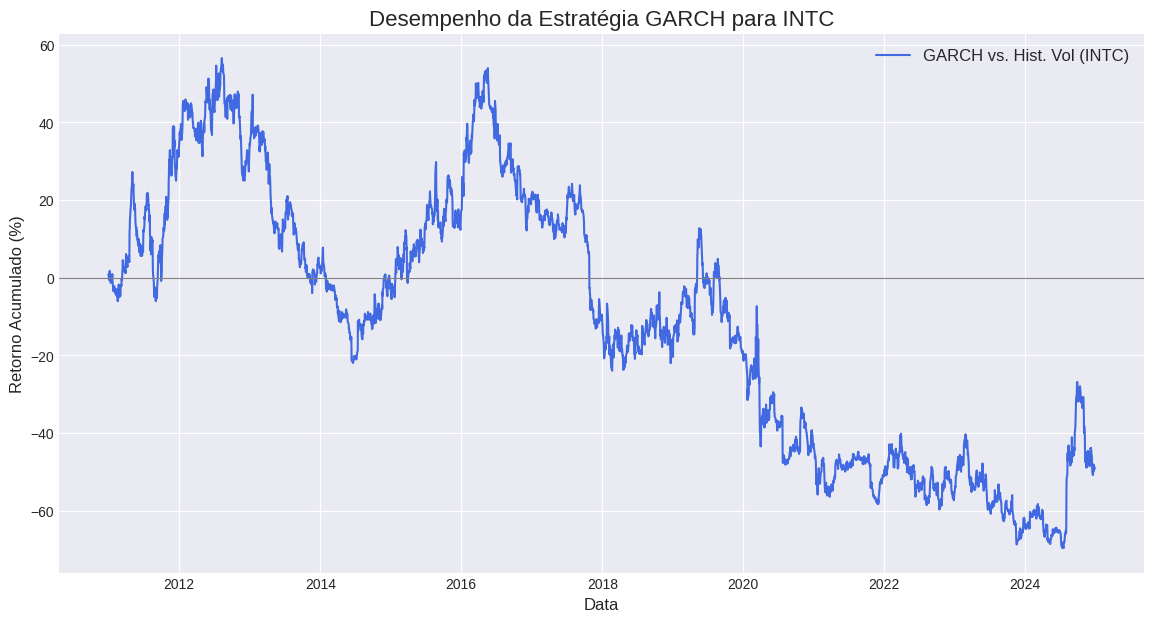


--- Resultado Final do Retorno Acumulado ---
Ativo: ^GSPC  | Retorno Total: 411.62%
Ativo: NVDA   | Retorno Total: -99.07%
Ativo: AMD    | Retorno Total: -94.24%
Ativo: INTC   | Retorno Total: -49.21%


In [ ]:
# ==============================================================================
# Bloco de Código - Estratégias GARCH Adaptativas com Parâmetros Individualizados
# ==============================================================================

# 1. Importação de Bibliotecas
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model # Import the arch library
from arch.univariate.base import ConvergenceWarning # Import ConvergenceWarning
import warnings # Import warnings

# 2. Coleta de Dados para Todos os Ativos
print("Iniciando coleta de dados...")
# Lista de todos os tickers que precisamos
tickers = ['^GSPC', 'NVDA', 'AMD', 'INTC', '^VIX']
start_date = "2010-01-01"
end_date = "2024-12-30"

# Baixa todos os dados de uma vez
# Use auto_adjust=False to keep 'Adj Close' if available
all_data = yf.download(tickers, start=start_date, end=end_date, progress=False, auto_adjust=False)

# Prepara o DataFrame final com os retornos e o VIX
df = pd.DataFrame()
for ticker in ['^GSPC', 'NVDA', 'AMD', 'INTC']:
    # Access 'Adj Close' using the MultiIndex tuple
    adj_close_col = ('Adj Close', ticker)
    close_col = ('Close', ticker)

    if adj_close_col in all_data.columns:
        df[f'Returns_{ticker}'] = all_data[adj_close_col].pct_change()
    elif close_col in all_data.columns:
        print(f"Warning: ('Adj Close', '{ticker}') not found, using ('Close', '{ticker}').")
        df[f'Returns_{ticker}'] = all_data[close_col].pct_change()
    else:
        print(f"Error: No price data found for {ticker}. Skipping.")
        continue


# Access 'Adj Close' for VIX using the MultiIndex tuple
vix_adj_close_col = ('Adj Close', '^VIX')
vix_close_col = ('Close', '^VIX')

if vix_adj_close_col in all_data.columns:
    df['VIX_Close'] = all_data[vix_adj_close_col]
elif vix_close_col in all_data.columns:
     print("Warning: ('Adj Close', '^VIX') not found for VIX, using ('Close', '^VIX').")
     df['VIX_Close'] = all_data[vix_close_col]
else:
    print("Error: No price data found for ^VIX. VIX analysis will not be possible.")


df = df.dropna()
print("Dados para todos os ativos carregados e alinhados.")


# 3. Função para Rodar o Backtest com Modelo GARCH
def run_garch_backtest(returns_series, vix_series=None):
    """
    Executa o backtest da estratégia GARCH vs. VIX (para ^GSPC) ou GARCH vs. Volatilidade Histórica (para outros ativos).
    """
    window_size = 250 # aproximadamente 1 ano de pregão

    garch_forecasts = []
    signals = []

    print("🔄 Estimando volatilidade com GARCH(1,1) e gerando sinais...")

    for i in range(len(returns_series)):
        end_idx = returns_series.index[i]
        start_idx = returns_series.index.get_loc(end_idx) - window_size

        if start_idx < 0:
            garch_forecasts.append(np.nan)
            signals.append(np.nan)
            continue

        # Seleciona a janela de treinamento
        train_returns = returns_series.iloc[start_idx:start_idx + window_size].dropna() # Drop NaNs in training window

        if len(train_returns) < 100: # Ensure sufficient data points for fitting
             garch_forecasts.append(np.nan)
             signals.append(np.nan)
             continue


        # Ajusta o modelo GARCH(1,1)
        try:
            model = arch_model(train_returns, vol='GARCH', p=1, q=1, rescale=False)
            # Catch ConvergenceWarning specifically
            with warnings.catch_warnings():
                warnings.filterwarnings("ignore", category=ConvergenceWarning)
                fitted_model = model.fit(disp='off')


            # Previsão de 1 passo à frente (variância)
            forecast = fitted_model.forecast(horizon=1)
            variance_forecast = forecast.variance.values[-1, 0]

            # Volatilidade anualizada (%)
            annualized_vol = np.sqrt(variance_forecast) * np.sqrt(252) * 100
            garch_forecasts.append(annualized_vol)

            # --- LÓGICA CONDICIONAL DA ESTRATÉGIA ---
            signal = -1 # Sinal padrão é vender/neutro (corrigido para seguir a lógica anterior)

            if vix_series is not None: # Estratégia para S&P 500 (GARCH vs VIX)
                vix_market = vix_series.iloc[i]
                if np.isnan(vix_market):
                    signal = np.nan
                elif vix_market > annualized_vol:
                    signal = 1 # Comprar quando VIX > GARCH previsto
                else:
                    signal = -1 # Vender/Neutro quando VIX <= GARCH previsto
            else: # Estratégia para outros ativos (GARCH vs Volatilidade Histórica)
                # Calcula volatilidade histórica móvel (50 dias)
                hist_vol_market = returns_series.iloc[max(0, i-50):i].std() * np.sqrt(252) * 100
                if np.isnan(hist_vol_market):
                    signal = np.nan
                elif annualized_vol < hist_vol_market:
                     signal = 1 # Comprar quando GARCH previsto < Vol Histórica
                else:
                     signal = -1 # Vender/Neutro quando GARCH previsto >= Vol Histórica


            signals.append(signal)

        except Exception as e:
            # print(f"Erro na simulação GARCH no dia {returns_series.index[i]}: {e}")
            garch_forecasts.append(np.nan)
            signals.append(np.nan)


    # Calcula e retorna a curva de patrimônio
    signals_series = pd.Series(signals, index=returns_series.index)
    strategy_returns = signals_series * returns_series.shift(-1)
    equity_curve = (1 + strategy_returns).cumprod() - 1
    return equity_curve, pd.Series(garch_forecasts, index=returns_series.index)


# 4. Execução Principal com Lógica Adaptativa e Parâmetros Individualizados

asset_tickers = ['^GSPC', 'NVDA', 'AMD', 'INTC']
results = {}
garch_vol_results = {}


# Loop para rodar o backtest em cada ativo com a estratégia e parâmetros corretos
for ticker in asset_tickers:
    print(f"\n--- Executando backtest para: {ticker} ---")
    returns_col = f'Returns_{ticker}'

    if ticker == '^GSPC':
        print(f"Usando estratégia: GARCH vs. VIX")
        if 'VIX_Close' in df.columns:
            equity_curve, garch_vols = run_garch_backtest(df[returns_col], vix_series=df['VIX_Close'])
            results[ticker] = equity_curve
            garch_vol_results[ticker] = garch_vols
        else:
            print(f"Skipping {ticker} backtest as VIX data is not available.")
    else:
        print(f"Usando estratégia: GARCH vs. Volatilidade Histórica")
        equity_curve, garch_vols = run_garch_backtest(df[returns_col]) # No VIX series for other assets
        results[ticker] = equity_curve
        garch_vol_results[ticker] = garch_vols


print("\nTodos os backtests foram concluídos!")

# 5. Consolidação e Visualização dos Resultados
results_df = pd.DataFrame(results) # Keep NaNs initially for correct plotting
garch_vol_df = pd.DataFrame(garch_vol_results)


plt.style.use('seaborn-v0_8-darkgrid')
plt.figure(figsize=(16, 9))

# Plot dos resultados com legendas claras
for ticker in results_df.columns:
    label = f'GARCH vs. VIX ({ticker})' if ticker == '^GSPC' else f'GARCH vs. Hist. Vol ({ticker})'
    # Ensure there's data to plot before plotting
    if not results_df[ticker].dropna().empty:
      plt.plot((results_df[ticker].dropna() * 100), label=label, linewidth=2) # Drop NaNs for plotting
    else:
      print(f"No data to plot for {ticker} equity curve.")


plt.title('Comparativo de Desempenho com Estratégias Baseadas em GARCH', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Retorno Acumulado (%)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# --- NOVO BLOCO: Gráficos de Desempenho Individual por Ativo (GARCH) ---
print("\n--- Gerando Gráficos de Desempenho Individual (GARCH) ---")
for ticker in results_df.columns:
    # Cria uma nova figura para cada gráfico, garantindo que sejam separados
    plt.figure(figsize=(14, 7))

    label = f'GARCH vs. VIX ({ticker})' if ticker == '^GSPC' else f'GARCH vs. Hist. Vol ({ticker})'
    # Ensure there's data to plot before plotting
    if not results_df[ticker].dropna().empty:
        plt.plot((results_df[ticker].dropna() * 100), label=label, color='royalblue')
        plt.title(f'Desempenho da Estratégia GARCH para {ticker}', fontsize=16)
        plt.xlabel('Data', fontsize=12)
        plt.ylabel('Retorno Acumulado (%)', fontsize=12)
        plt.legend(fontsize=12)
        plt.grid(True)
        plt.axhline(0, color='grey', linewidth=0.8) # Adiciona linha no zero
        plt.show()
    else:
        print(f"No data to plot for {ticker} individual equity curve.")


# --- Métricas Finais ---
print("\n--- Resultado Final do Retorno Acumulado ---")
# Calculate final return by taking the last non-NaN value for each ticker
final_returns_net = pd.Series({ticker: results_df[ticker].dropna().iloc[-1] * 100 if not results_df[ticker].dropna().empty else np.nan for ticker in results_df.columns}).dropna()


for ticker in final_returns_net.index:
    final_return = final_returns_net[ticker]
    print(f"Ativo: {ticker:<6} | Retorno Total: {final_return:.2f}%")

## Portfolio Cointegrado

In [ ]:
def portf_download_data(start_date, end_date, candidate_stocks=None):
    # Lista de ativos candidatos, caso nenhum trio especifico seja informado
    if not candidate_stocks:
        candidate_stocks = [
            'ITUB4.SA', 'BBDC4.SA', 'BBAS3.SA', 'ITSA4.SA',
            'VALE3.SA', 'GGBR4.SA', 'GOAU4.SA',
            'PETR4.SA', 'PRIO3.SA', 'PETR3.SA',
            'ELET3.SA', 'CMIG4.SA', 'SBSP3.SA',
            'LREN3.SA', 'MGLU3.SA', 'WEGE3.SA'
        ]

    # Baixando todos os dados de uma vez para eficiência
    try:
        from datetime import datetime
        full_data = yf.download(candidate_stocks, start=start_date, end=end_date, progress=False)['Close']
        full_data.dropna(inplace=True)
    except Exception as e:
        print(f"Erro ao baixar os dados: {e}")
        exit()

    return full_data, candidate_stocks

def count_mean_crossings(spread):
    """
    Conta quantas vezes a série cruzou sua própria média.
    """
    mean = spread.mean()
    # Verifica onde o sinal da diferença (spread - média) muda
    crossings = np.sum(np.diff(np.sign(spread - mean)) != 0)
    return crossings

def johansen_test(full_data, candidate_stocks, validation_start_date):
    df = full_data[full_data.index < validation_start_date]
    test_result = coint_johansen(df, det_order=0, k_ar_diff=1)
    critical_value_95 = test_result.cvt[0, 1]
    trace_statistic = test_result.lr1[0]

    if trace_statistic > critical_value_95:
        print(f"O trio {candidate_stocks} possui cointegração no periodo definido")
        return True
    else:
        print(f"O trio {candidate_stocks} não possui cointegração no periodo definido")
        return False

def search_trio_candidates(candidate_stocks, full_data, start_date, end_date, validation_start_date):
    # BUSCA E SELEÇÃO DO TRIO (USANDO APENAS DADOS DE TREINO)
    print("Iniciando busca por trios com potencial de trading...")
    all_trios = list(itertools.combinations(candidate_stocks, 3))
    evaluated_trios = []

    # Baixando todos os dados de uma vez para eficiência
    try:
        from datetime import datetime
        full_data = yf.download(candidate_stocks, start=start_date, end=end_date, progress=False)['Close']
        full_data.dropna(inplace=True)
    except Exception as e:
        print(f"Erro ao baixar os dados: {e}")
        exit()

    # Separando os dados de treino para a busca
    df_train_search = full_data[full_data.index < validation_start_date]

    for trio in all_trios:
        symbols = list(trio)
        df = df_train_search[symbols].dropna()

        if len(df) < 100: continue

        try:
            # Passo 1: Verificar se o trio é cointegrado
            test_result = coint_johansen(df, det_order=0, k_ar_diff=1)
            critical_value_95 = test_result.cvt[0, 1]
            trace_statistic = test_result.lr1[0]

            if trace_statistic > critical_value_95:
                # Passo 2: Calcular as métricas de "tradabilidade"
                coint_vector = test_result.evec[:, 0]
                spread = df.dot(coint_vector)

                crossings = count_mean_crossings(spread)
                spread_std = spread.std()
                coint_score = trace_statistic / critical_value_95

                # Adicionamos todos os trios cointegrados para ranking
                evaluated_trios.append({
                    "trio": symbols,
                    "coint_score": coint_score,
                    "crossings": crossings,
                    "spread_std": spread_std
                })

        except (np.linalg.LinAlgError, ValueError): # Ignora erros de matriz singular ou outros problemas
            continue

    if not evaluated_trios:
        print("\nBusca concluída. Nenhum trio com características de trading foi encontrado.")
    else:
        # Passo 3: Criar um Ranking Combinado
        df_results = pd.DataFrame(evaluated_trios)

        # Criar rankings individuais (maior é melhor para score/crossings, menor é melhor para std)
        df_results['rank_score'] = df_results['coint_score'].rank(ascending=False)
        df_results['rank_crossings'] = df_results['crossings'].rank(ascending=False)
        df_results['rank_std'] = df_results['spread_std'].rank(ascending=True) # Menor desvio padrão é melhor

        # Ranking final é a soma dos rankings individuais
        df_results['final_rank'] = df_results['rank_score'] + df_results['rank_crossings'] + df_results['rank_std']

        # Ordenar pelo melhor ranking final (menor soma de ranks é melhor)
        df_results = df_results.sort_values(by='final_rank').reset_index(drop=True)

        print(f"\nBusca concluída. {len(df_results)} trios cointegrados encontrados e rankeados.")
        print("Top 5 melhores trios com base no ranking combinado:")
        print(df_results[['trio', 'coint_score', 'crossings', 'spread_std', 'final_rank']].head())

        # Selecionar o melhor trio
        best_trio_info = df_results.iloc[0]
        coint_symbols = best_trio_info['trio']

        print("-" * 50)
        print(f"\nTRIO SELECIONADO PARA BACKTEST: {coint_symbols}")
        print(f" (Score: {best_trio_info['coint_score']:.2f}, Cruzamentos: {best_trio_info['crossings']}, Volatilidade Spread: {best_trio_info['spread_std']:.4f})")
        print("-" * 50)

        # retorna trio escolhido
        return coint_symbols

def portf_visualize_results(coint_symbols, df_backtest, portf_acumm_return, start_validation_date, end_date, validation_spread, spread_mean, spread_std, signals, inferior_boundary, superior_boundary):
    # PREÇOS BRUTOS DOS ATIVOS
    fig, ax = plt.subplots(figsize=(15, 7))
    df_backtest.plot(ax=ax, linewidth=1.5)
    ax.set_title(f'Evolução dos Preços do Trio {coint_symbols} (Período de Validação)', fontsize=16)
    ax.set_xlabel('Data')
    ax.set_ylabel('Preço (R$)')
    ax.legend(title='Ativos')
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.setp(ax.get_xticklabels(), rotation=0, ha="right")
    plt.tight_layout()
    plt.show()

    # DIAGNÓSTICO DO SPREAD
    fig, ax1 = plt.subplots(figsize=(15, 7))
    ax1.plot(validation_spread.index, validation_spread, label='Spread de Validação', color='blue')
    ax1.axhline(spread_mean, color='black', linestyle='--', label=f'Média de Treino ({spread_mean:.2f})')
    ax1.axhline(superior_boundary, color='red', linestyle='--', label=f'Limite Superior ({superior_boundary:.2f})')
    ax1.axhline(inferior_boundary, color='green', linestyle='--', label=f'Limite Inferior ({inferior_boundary:.2f})')
    ax1.set_title(f'Diagnóstico do Spread para o Trio {coint_symbols}', fontsize=16)
    ax1.legend()
    ax1.set_xlim(df_backtest.index.min(), df_backtest.index.max()) # Define os limites
    ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1)) # Um marcador por mês
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m')) # Formato Ano-Mês
    plt.setp(ax1.get_xticklabels(), rotation=0, ha="right") # Rotaciona para não sobrepor
    plt.tight_layout() # Ajusta o layout para caber os rótulos rotacionados
    plt.show()

    # RETORNO ACUMULADO
    plt.style.use('seaborn-v0_8-darkgrid')
    fig, ax2 = plt.subplots(figsize=(15, 7))
    (portf_acumm_return - 1).plot(ax=ax2, linewidth=2)
    ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    ax2.set_title(f'Retorno Acumulado da Estratégia Portfolio Cointegrado para o Trio {coint_symbols}', fontsize=16)
    ax2.axhline(0, color='black', linestyle='--', linewidth=0.8)
    final_percent_return = (portf_acumm_return.iloc[-1] - 1) * 100
    ax2.text(portf_acumm_return.index[-1], (portf_acumm_return.iloc[-1]-1), f' Retorno Final: {final_percent_return:.2f}%',
              verticalalignment='center', fontsize=12, weight='bold')
    ax2.set_xlim(df_backtest.index.min(), df_backtest.index.max()) # Define os limites
    ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=1)) # Um marcador por mês
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m')) # Formato Ano-Mês
    plt.setp(ax2.get_xticklabels(), rotation=0, ha="right") # Rotaciona para não sobrepor
    plt.tight_layout()
    plt.show()

    print(f"\nRetorno Total Acumulado da Estratégia {start_validation_date} -> {end_date}: {final_percent_return:.2f}%")
    num_trades = (signals['position'].diff() != 0).sum()
    print(f"Número de trades executados no período de validação: {num_trades}")

def portf_coint_backtest(backtest_trio, full_data, start_date, end_date, validation_start_date, visualize_results=False):
    # Carregar dados do trio selecionado para o período completo
    df_coint = full_data[backtest_trio].dropna()

    # Divisão dos dados em Período de Treinamento e Período de Validação
    df_train = df_coint[df_coint.index < validation_start_date]
    df_backtest = df_coint[df_coint.index >= validation_start_date]

    # Recalcular os parâmetros do modelo APENAS com os dados de treino do trio selecionado
    johansen_result = coint_johansen(df_train, det_order=0, k_ar_diff=1)
    coint_vector = johansen_result.evec[:, 0]

    train_spread = df_train.dot(coint_vector)
    spread_mean = train_spread.mean()
    spread_std = train_spread.std()

    lim_factor = 1.5 # Fator do desvio padrão para os limites
    superior_boundary = spread_mean + lim_factor * spread_std
    inferior_boundary = spread_mean - lim_factor * spread_std

    # Validação do Modelo (Backtesting)
    validation_spread = df_backtest.dot(coint_vector)
    signals = pd.DataFrame(index=df_backtest.index)
    signals['portfolio_price'] = validation_spread
    signals['signal'] = 0
    signals.loc[signals['portfolio_price'] > superior_boundary, 'signal'] = -1
    signals.loc[signals['portfolio_price'] < inferior_boundary, 'signal'] = 1
    signals['position'] = signals['signal'].replace(0, np.nan).ffill().fillna(0)

    # Calcular os retornos diários dos ativos individuais no período de backtest
    single_returns = df_backtest.pct_change()

    # 2. Calcular o retorno diário bruto do portfólio (spread)
    #    Isso é o produto escalar dos retornos individuais pelo vetor de cointegração.
    #    O sinal do coint_vector determina se estamos comprados ou vendidos em cada ativo.
    portfolio_raw_return = single_returns.dot(coint_vector)

    # 3. O retorno da estratégia é o retorno bruto do portfólio multiplicado pela posição do dia anterior.
    #    Usamos signals['position'].shift(1) para evitar lookahead bias.
    #    O sinal da posição já nos diz se estamos comprados (+1) ou vendidos (-1) no spread.
    estrategy_return = (portfolio_raw_return * signals['position'].shift(1)).fillna(0)

    # 4. Calcular o retorno acumulado da forma correta
    portf_acumm_return = (1 + estrategy_return).cumprod()

    if visualize_results:
        portf_visualize_results(backtest_trio, df_backtest, portf_acumm_return, validation_start_date, end_date, validation_spread, spread_mean, spread_std, signals, inferior_boundary, superior_boundary)

    return df_backtest, portf_acumm_return

from statsmodels.tsa.vector_ar.vecm import coint_johansen
import itertools
import matplotlib.ticker as mtick
import matplotlib.dates as mdates

start_date = "2010-01-01"
end_date = "2021-12-31"
validation_start_date = "2021-01-01"

### Backtest para trio PETROBRAS, VALE e WEG

O trio ['PETR3.SA', 'VALE3.SA', 'WEGE3.SA'] possui cointegração no periodo definido


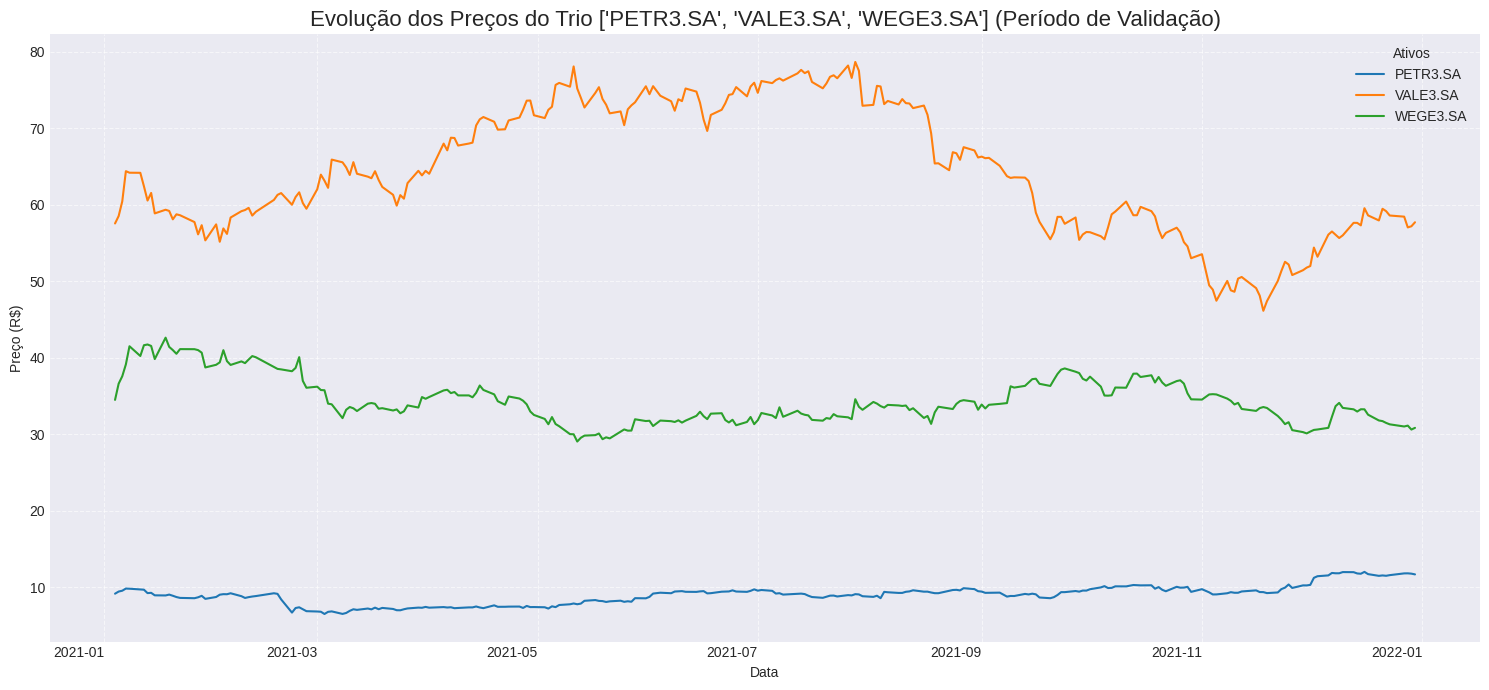

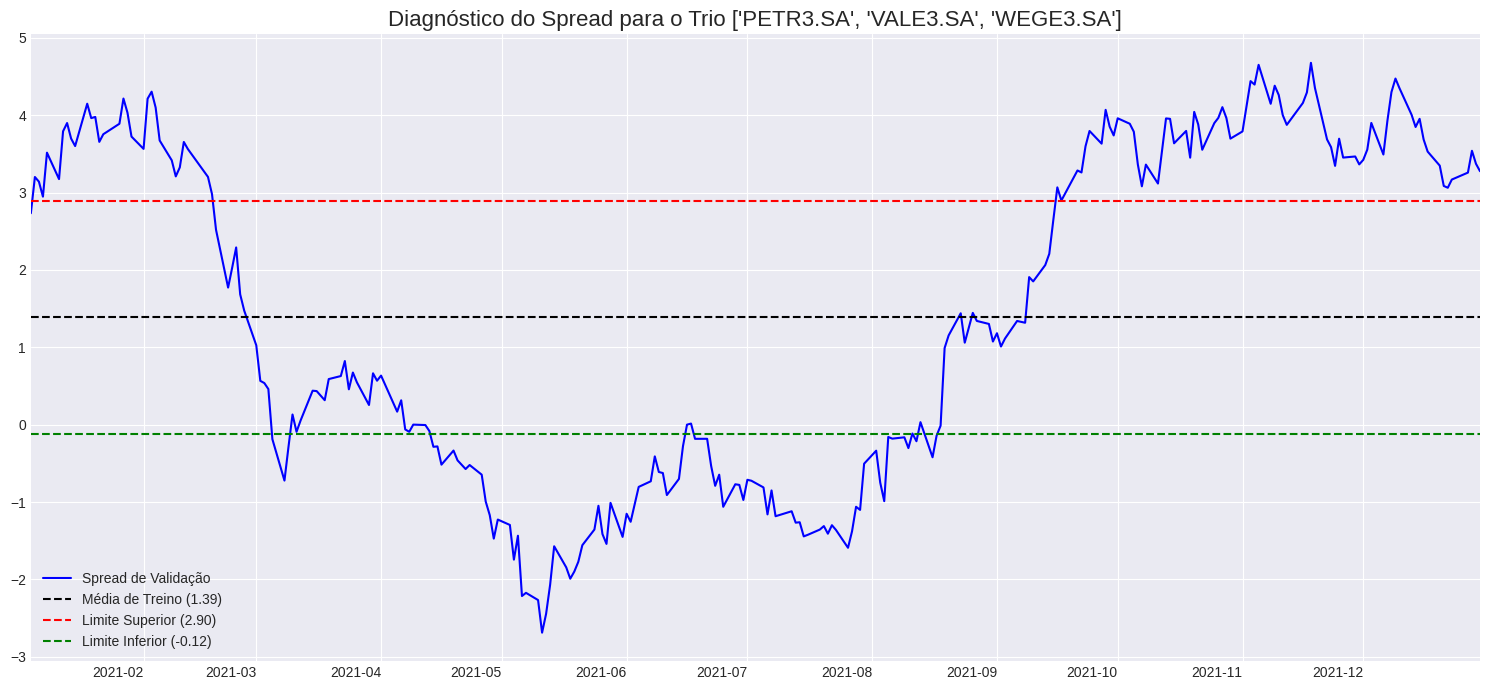

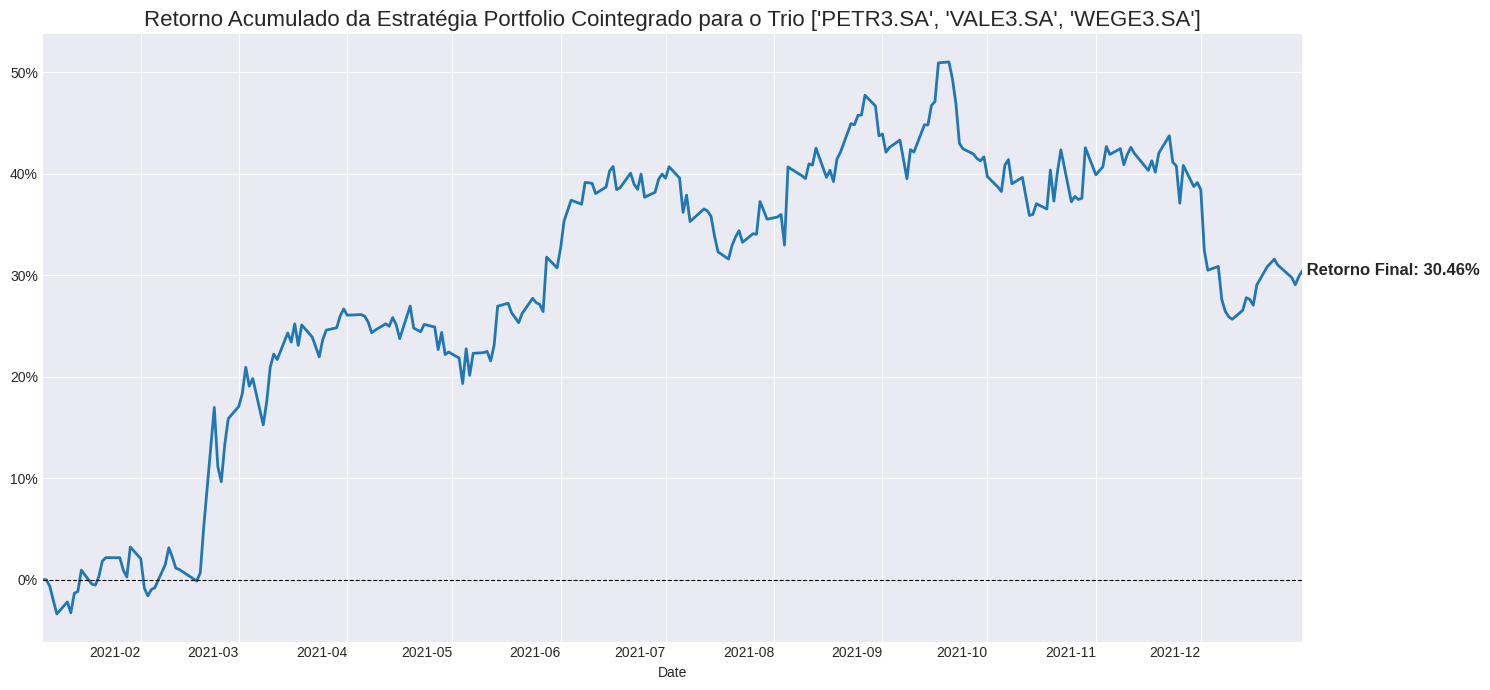


Retorno Total Acumulado da Estratégia 2021-01-01 -> 2021-12-31: 30.46%
Número de trades executados no período de validação: 4


In [ ]:
candidate_stocks = ['PETR3.SA', 'VALE3.SA', 'WEGE3.SA']
full_data, candidate_stocks = portf_download_data(start_date, end_date, candidate_stocks)
johansen_test(full_data, candidate_stocks, validation_start_date)
chosen_trio = candidate_stocks
portf_backtest, portf_accum_return = portf_coint_backtest(chosen_trio, full_data, start_date, end_date, validation_start_date, visualize_results=True)

### Backtest para trio NVIDIA, INTEL e AMD

O trio ['INTC', 'NVDA', 'AMD'] não possui cointegração no periodo definido


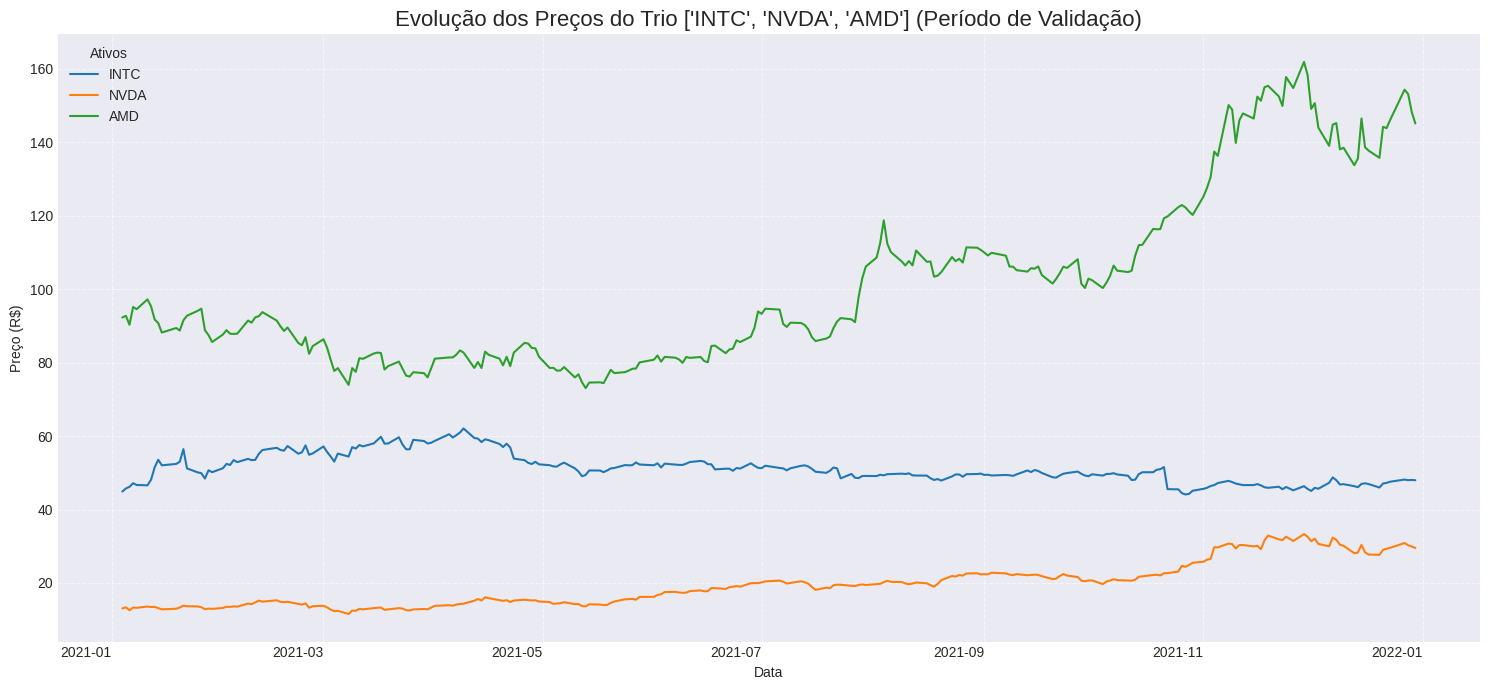

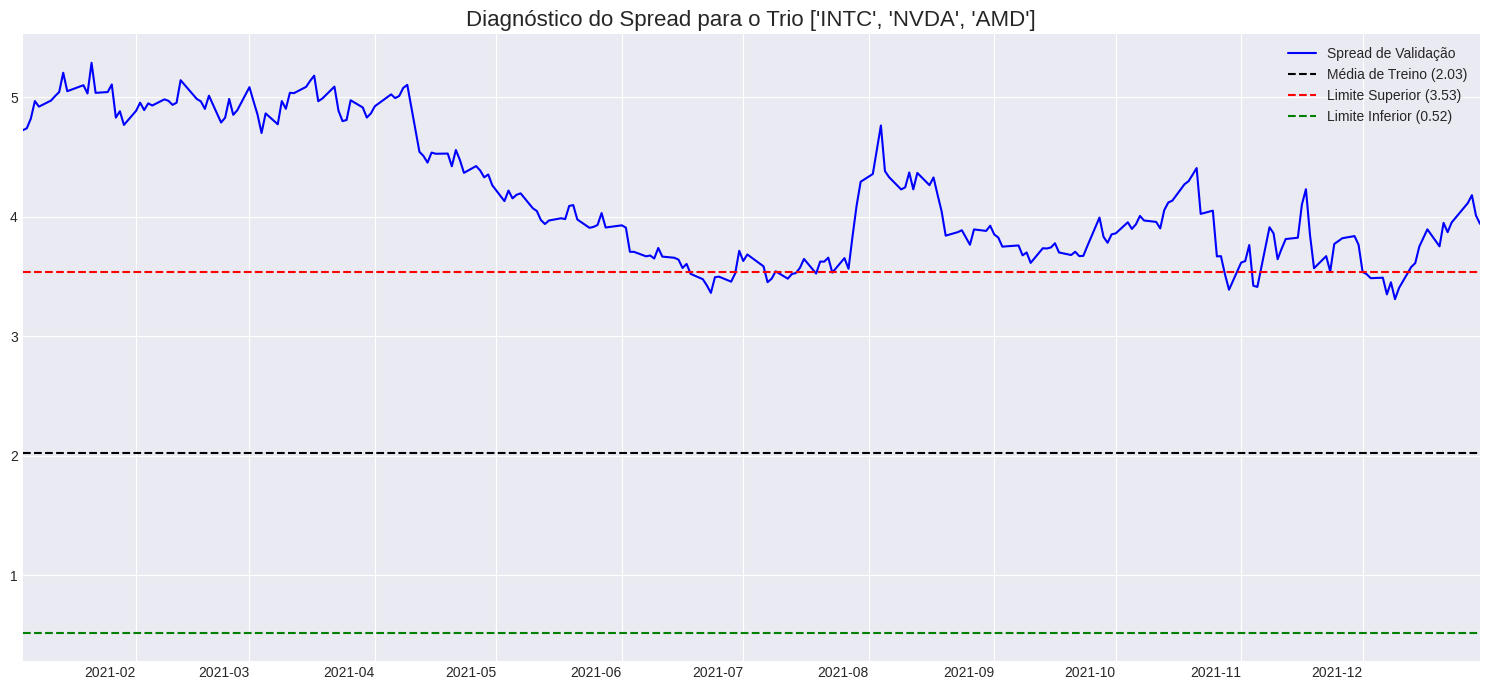

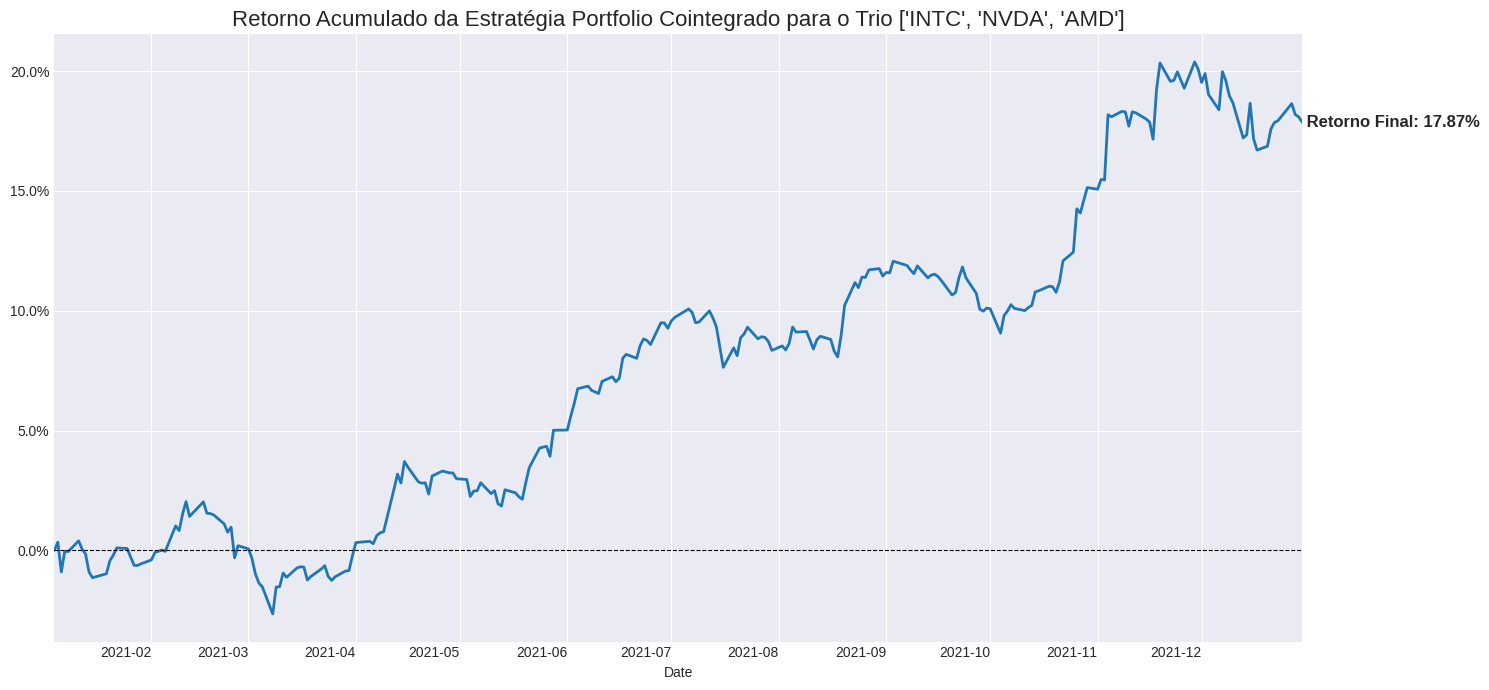


Retorno Total Acumulado da Estratégia 2021-01-01 -> 2021-12-31: 17.87%
Número de trades executados no período de validação: 1


In [ ]:
candidate_stocks = ['INTC', 'NVDA', 'AMD']
full_data, candidate_stocks = portf_download_data(start_date, end_date, candidate_stocks)
johansen_test(full_data, candidate_stocks, validation_start_date)
chosen_trio = candidate_stocks
portf_backtest, portf_accum_return = portf_coint_backtest(chosen_trio, full_data, start_date, end_date, validation_start_date, visualize_results=True)

## Análises por janelas **temporais**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def analisar_retornos(df_garch_backtest,
                      tipo="yearly", start_date="2010-01-01", end_date="2021-12-31"):
    """
    Analisa e plota os retornos acumulados das estratégias Heston, GARCH e Portfolio
    em janelas fixas (yearly/monthly) ou contínuas (rolling).
    """

    # --- Função auxiliar para janelas fixas ---
    def analyze_period_windows(df, window_type="yearly"):
        result = []
        if window_type == "yearly":
            group_keys = df.index.to_period("Y")
        elif window_type == "monthly":
            group_keys = df.index.to_period("M")
        else:
            raise ValueError("window_type deve ser 'yearly' ou 'monthly'")

        for period in sorted(set(group_keys)):
            df_period = df[group_keys == period]
            if len(df_period) < 10:
                continue
            final = df_period.iloc[-1]
            initial = df_period.iloc[0]
            returns = final - initial
            result.append({"Período": str(period), **returns.to_dict()})

        return pd.DataFrame(result)

    # --- Verificações iniciais ---
    # if 'Skill_Equity_Curve' not in df_heston_backtest.columns:
    #     print("❌ 'Skill_Equity_Curve' não encontrado em df_heston_backtest.")
    #     return
    if 'GARCH_Equity_Curve' not in df_garch_backtest.columns:
        print("❌ 'GARCH_Equity_Curve' não encontrado em df_garch_backtest.")
        return


    # --- Construção das curvas de retorno acumulado ---
    equity_curves = pd.DataFrame({
        #'Heston': df_heston_backtest['Skill_Equity_Curve'],
        'GARCH': df_garch_backtest['GARCH_Equity_Curve'],

    })

    # Alinhar datas comuns
    common_index = equity_curves.dropna().index
    equity_curves = equity_curves.reindex(common_index).ffill().dropna()

    # Recorte de datas
    equity_curves_analysis = equity_curves.loc[start_date:end_date].copy()
    if equity_curves_analysis.empty:
        print(f"❌ Sem dados entre {start_date} e {end_date}")
        return

    # --- Análise por tipo ---
    if tipo in ["yearly", "monthly"]:
        df_period_analysis = analyze_period_windows(equity_curves_analysis, window_type=tipo)
        print(f"\n🔍 Retornos por {tipo.capitalize()} de {start_date} a {end_date}:")
        print(df_period_analysis)

        # Plot de barras
        df_period_analysis.set_index("Período").plot(kind="bar", figsize=(14, 6))
        plt.title(f"Retorno por {tipo.capitalize()} das Estratégias ({start_date} a {end_date})")
        plt.ylabel("Retorno")
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

    elif tipo == "rolling":
        print(f"\n📈 Retorno acumulado de {start_date} a {end_date}:")
        equity_curves_analysis.plot(figsize=(14, 6))
        plt.title(f"Retorno Acumulado das Estratégias ({start_date} a {end_date})")
        plt.xlabel("Data")
        plt.ylabel("Retorno Acumulado")
        plt.grid(True)
        plt.tight_layout()
        plt.legend()
        plt.show()

    else:
        print("❌ Tipo inválido. Use 'yearly', 'monthly' ou 'rolling'.")



📈 Retorno acumulado de 2010-01-01 a 2021-12-31:


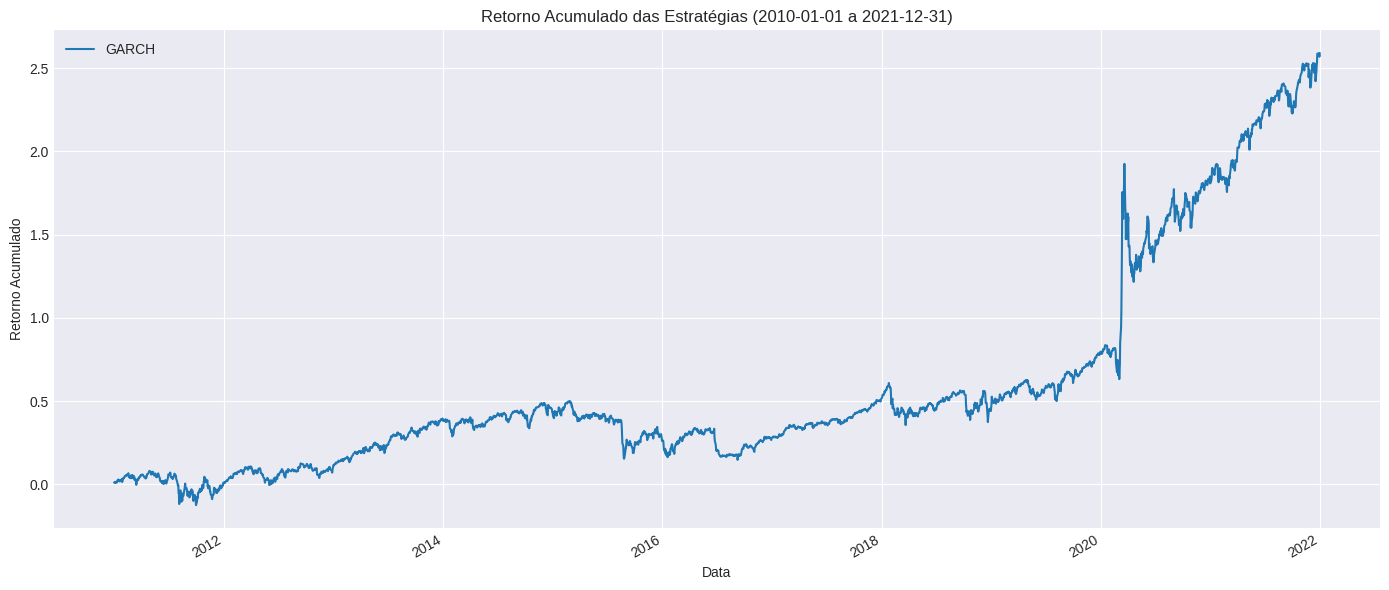

In [ ]:
analisar_retornos(
    #df_heston_backtest=aux, # Use the distinct Heston results dataframe
    df_garch_backtest=df_garch_backtest,  # Use the distinct GARCH results dataframe
    #df_portf_backtest=portf_accum_return, # Use the Portfolio accumulated return
    tipo="rolling",  # or "yearly", "monthly", "rolling"
    start_date="2010-01-01",
    end_date="2021-12-31" # Adjust dates as needed
)